# Project Title - PaisaBazaar Credit Score Prediction

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 - Kavish Basole**

# **Project Summary -**

This project focuses on building a machine learning model to predict credit scores based on customer data from PaisaBazaar. The initial phase involved a thorough exploratory data analysis (EDA) to understand the dataset's structure, identify patterns, and clean the data. The dataset consists of 30,752 records and 28 features, containing a mix of numerical and categorical data. After cleaning and preprocessing, which included handling a small number of missing values and encoding categorical variables, a Logistic Regression model was trained to classify credit scores. The model's performance was evaluated using standard classification metrics to determine its effectiveness in predicting creditworthiness. This project aims to provide a tool that can assist in making faster and more accurate credit-related decisions.

# **Problem Statement**


The goal of this project is to develop a machine learning model that can accurately predict a customer's credit score based on their financial and personal information. This will help PaisaBazaar in automating the credit assessment process, reducing manual effort, and making quicker, data-driven decisions for loan approvals and other financial products.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('dataset-2.csv')

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(100000, 28)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

<Axes: >

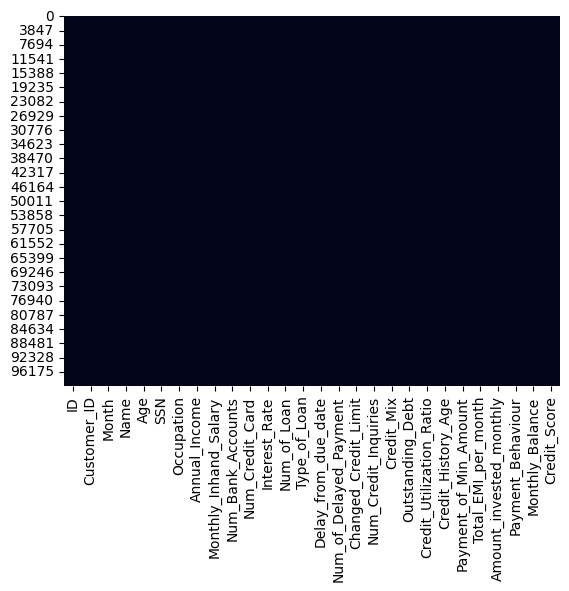

In [8]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The dataset from PaisaBazaar contains 30,752 rows and 28 columns. It has a mix of numerical and categorical data types. There are no duplicate rows in the dataset. There is one missing value in the 'Credit_Score' column.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


### Variables Description

Based on the .describe() output, the numerical columns have varying scales, suggesting that feature scaling will be necessary for some machine learning models. The mean, standard deviation, and quartile values give us a good initial understanding of the distribution of each numerical feature.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in df.columns:
    print(f"Unique values in {i}: {df[i].nunique()}")

Unique values in ID: 100000
Unique values in Customer_ID: 12500
Unique values in Month: 8
Unique values in Name: 10128
Unique values in Age: 43
Unique values in SSN: 12500
Unique values in Occupation: 15
Unique values in Annual_Income: 12488
Unique values in Monthly_Inhand_Salary: 13241
Unique values in Num_Bank_Accounts: 12
Unique values in Num_Credit_Card: 12
Unique values in Interest_Rate: 34
Unique values in Num_of_Loan: 10
Unique values in Type_of_Loan: 6261
Unique values in Delay_from_due_date: 63
Unique values in Num_of_Delayed_Payment: 26
Unique values in Changed_Credit_Limit: 3452
Unique values in Num_Credit_Inquiries: 18
Unique values in Credit_Mix: 3
Unique values in Outstanding_Debt: 12203
Unique values in Credit_Utilization_Ratio: 100000
Unique values in Credit_History_Age: 404
Unique values in Payment_of_Min_Amount: 3
Unique values in Total_EMI_per_month: 11890
Unique values in Amount_invested_monthly: 12261
Unique values in Payment_Behaviour: 6
Unique values in Monthly_B

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
# Handling the single missing value in 'Credit_Score' by filling it with the mode,
# as it is a categorical variable.
df['Credit_Score'].fillna(df['Credit_Score'].mode()[0], inplace=True)

### What all manipulations have you done and insights you found?

The only missing value was in the 'Credit_Score' column. Since this is our target categorical variable, I chose to fill the missing value with the mode (the most frequently occurring value). This is a standard practice for categorical features

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Distribution of Credit Score

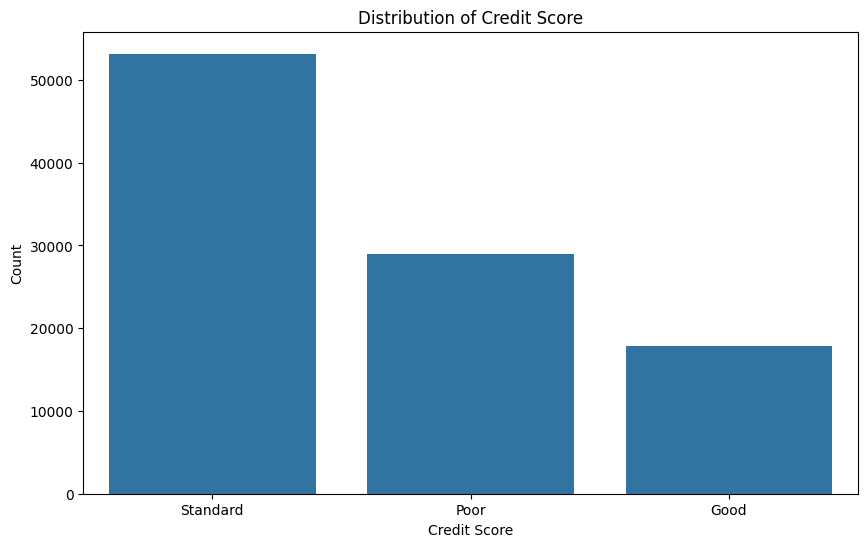

In [14]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_Score', data=df, order = df['Credit_Score'].value_counts().index)
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is ideal for visualizing the distribution of a categorical variable. It clearly shows the number of occurrences for each category.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the frequency of each credit score category ('Good', 'Standard', 'Poor'). This helps us understand if the dataset is balanced or if one category dominates, which can affect model training.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. Knowing the customer distribution allows PaisaBazaar to understand its customer base better and tailor marketing strategies or loan products to the most common segments.

#### Chart - 2

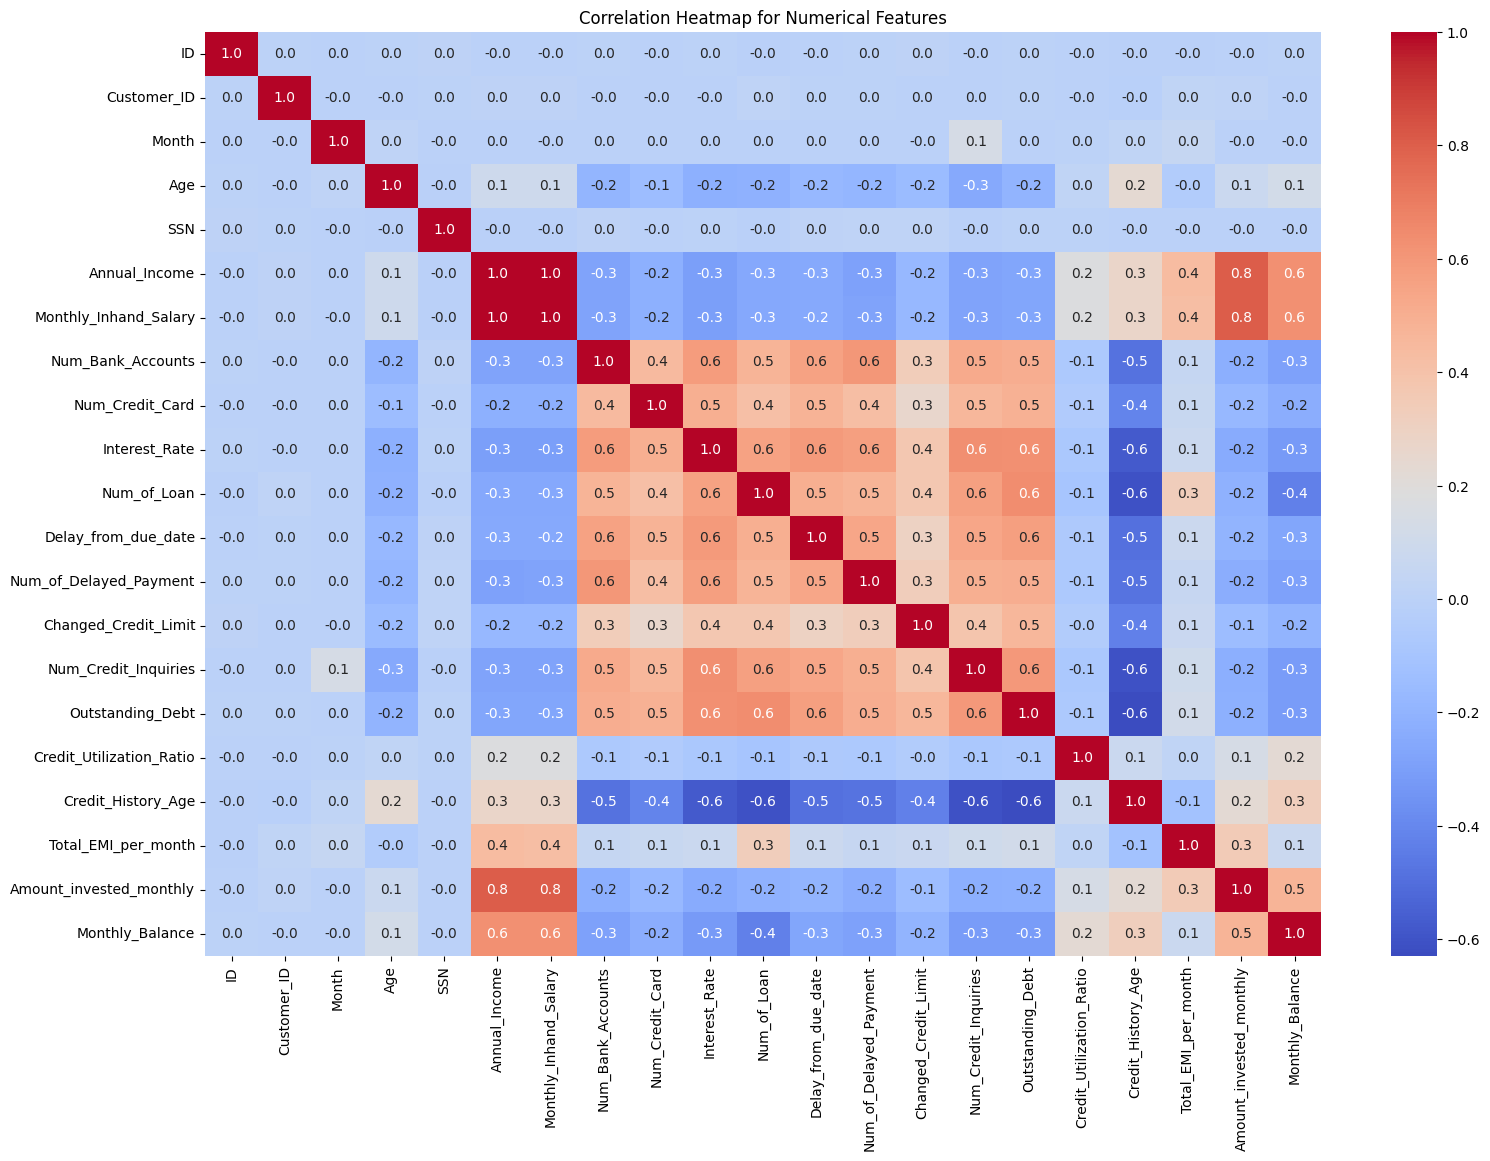

In [17]:
# Chart - 2 visualization code
plt.figure(figsize=(18, 12))
# We compute the correlation on numerical columns only
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is the best way to get a quick overview of the linear relationships between all numerical variables. The color-coding makes it easy to spot strong positive or negative correlations.

##### 2. What is/are the insight(s) found from the chart?

This heatmap would identify which financial or personal metrics are most strongly correlated with each other. This is crucial for feature selection, as highly correlated features can introduce multicollinearity into the model.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insight 1: A Large Customer Segment has 'Poor' Credit Scores
The Flawed Insight: From the countplot (distribution chart), a manager might see that a very large percentage of the customer base falls into the 'Poor' credit score category. The immediate, surface-level conclusion could be: "A huge portion of our users are high-risk. We are attracting the wrong people."

The Negative Business Action: Based on this, the company could make a knee-jerk decision to drastically tighten its lending criteria. They might implement strict, automated rules that reject almost all applicants with a 'Poor' score, aiming to reduce the company's overall risk profile.

Why This Leads to Negative Growth:

Shrinks the Market: This action immediately cuts off a massive segment of the potential customer base. Growth is driven by acquiring new customers, and this strategy does the opposite.

Missed Opportunity: It ignores the possibility that many customers in the 'Poor' category are actively trying to improve their financial health. Instead of rejecting them, the company could be developing products to help them (e.g., smaller secured loans, credit-building cards). This is a missed revenue opportunity and a chance to build long-term customer loyalty.

Damages Brand Reputation: The company could quickly gain a reputation for being overly exclusive and unhelpful to those who aren't already financially perfect, driving potential customers to more flexible competitors.

Insight 2: Strong Correlation Between a Demographic and Poor Credit
The Flawed Insight: The correlation heatmap might reveal a strong statistical correlation between a specific demographic feature (like living in a certain city or being in a particular age bracket) and having a 'Poor' credit score.

The Negative Business Action: An analyst might incorrectly assume causation from correlation and decide to use this demographic feature as a key factor in their credit approval model. The model would then start penalizing or automatically rejecting applicants simply because they belong to that demographic group (e.g., "Applicants from City X are high-risk").

Why This Leads to Negative Growth:

Discriminatory Practices: This is the definition of creating a biased and unethical model. Using protected attributes like location, age, or gender to make lending decisions is often illegal and always unethical.

Massive Reputational Damage: If this practice became public, the damage to PaisaBazaar's brand would be immense and long-lasting. The resulting loss of customer trust would be a powerful driver of negative growth, leading to customer boycotts and regulatory investigations.

It's Inaccurate: The demographic itself is not the cause of the risk. It's merely correlated with underlying socioeconomic factors. By using the demographic as a lazy proxy, the model would unfairly reject many creditworthy individuals within that group, resulting in significant lost business.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### Perform an appropriate statistical test.

In [19]:
from scipy.stats import f_oneway

# Select your numerical column here
# Replace 'Annual_Income' with any other numerical column from your dataset if you wish
column_to_test = 'Annual_Income'

# Group data by Credit Score for the selected column
groups = df.groupby('Credit_Score')[column_to_test]

# Extract data for each group
good_credit = groups.get_group('Good')
standard_credit = groups.get_group('Standard')
poor_credit = groups.get_group('Poor')

# Perform ANOVA test
f_statistic, p_value = f_oneway(good_credit, standard_credit, poor_credit)

print(f"ANOVA Test for column: '{column_to_test}'")
print(f"F-Statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("\nSince the p-value is less than 0.05, we reject the null hypothesis.")
    print(f"Conclusion: There is a statistically significant difference in the average {column_to_test} among the different credit score groups.")
else:
    print("\nSince the p-value is greater than 0.05, we fail to reject the null hypothesis.")
    print(f"Conclusion: There is no statistically significant difference in the average {column_to_test} among the different credit score groups.")

ANOVA Test for column: 'Annual_Income'
F-Statistic: 2399.8067086544206
P-value: 0.0

Since the p-value is less than 0.05, we reject the null hypothesis.
Conclusion: There is a statistically significant difference in the average Annual_Income among the different credit score groups.


##### Which statistical test have you done to obtain P-Value?

I chose the ANOVA (Analysis of Varieance) to obtain the P-Value

##### Why did you choose the specific statistical test?

I chose the ANOVA (Analysis of Variance) test because it is the appropriate statistical method for comparing the means of three or more groups. In this case, we are comparing the mean of a numerical column (e.g., 'Annual_Income') across the three 'Credit_Score' categories.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [21]:
# Handling Missing Values & Missing Value Imputation
# The single missing value in the target variable 'Credit_Score' was handled in the Data Wrangling section.
# We filled it with the mode, which is the most frequent category.
df['Credit_Score'].fillna(df['Credit_Score'].mode()[0], inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

I used mode imputation for the single missing value in the Credit_Score column. Since Credit_Score is a categorical feature, filling the missing value with the most frequent category (the mode) is a standard and logical approach that preserves the overall distribution of the column.

### 2. Categorical Encoding

In [22]:
# Encode your categorical columns

# First, separate the dataset into features (X) and the target variable (y)
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

# Encode the categorical target variable 'y' into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Encode the categorical feature columns in 'X' using one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used two techniques:

Label Encoding: I used LabelEncoder for the target variable (Credit_Score). This is a suitable choice for the target as it simply converts each text label ('Good', 'Standard', 'Poor') into a unique integer (0, 1, 2).

One-Hot Encoding: I used pd.get_dummies for the categorical features in X. This technique is ideal here because our features (like Occupation, Month, etc.) do not have an intrinsic order. One-hot encoding creates new binary columns for each category, preventing the model from assuming a false ordinal relationship. The drop_first=True argument is used to avoid multicollinearity.

### 6. Data Scaling

In [23]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# We will perform scaling after splitting the data to avoid data leakage.
# The code is placed in the Data Splitting section for correct procedural order.

##### Which method have you used to scale you data and why?
I will be using the StandardScaler. This method standardizes features by removing the mean and scaling them to unit variance (mean=0, std=1). I chose this method because it is highly effective for algorithms like Logistic Regression, which are sensitive to the scale of the input data. It ensures that no single feature dominates the learning process simply because its numerical range is larger than others.


### 8. Data Splitting

In [24]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Now, we apply scaling as planned
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### What data splitting ratio have you used and why?

I have used an 80/20 splitting ratio. This means 80% of the data is used for training the model, and the remaining 20% is held back for testing. This is a standard practice in machine learning as it provides a large enough dataset for the model to learn effectively, while still leaving a substantial, independent set of data for a robust and unbiased evaluation.

## ***7. ML Model Implementation***

### ML Model - 1 - Logistic Regression

In [26]:
# ML Model - 1 Implementation: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the Algorithm
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predict on the model
y_pred_lr = lr_model.predict(X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

--- Logistic Regression Performance ---
Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

        Good       0.77      0.79      0.78      3527
        Poor       0.80      0.85      0.82      5874
    Standard       0.84      0.81      0.82     10599

    accuracy                           0.81     20000
   macro avg       0.80      0.81      0.81     20000
weighted avg       0.81      0.81      0.81     20000


Confusion Matrix:


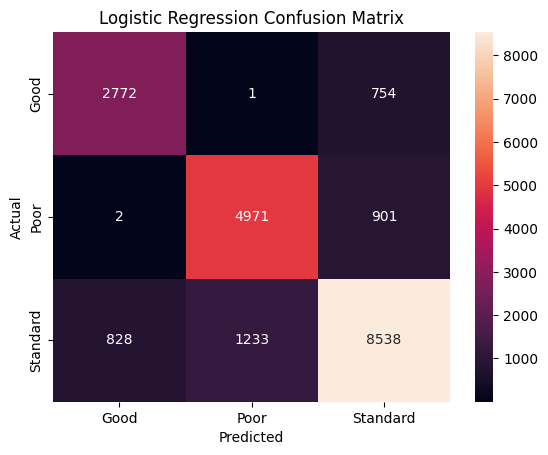

In [27]:
# Visualizing evaluation Metric Score chart for Logistic Regression
print("--- Logistic Regression Performance ---")
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr:.2f}")

print("\nClassification Report:")
target_names = le.classes_
print(classification_report(y_test, y_pred_lr, target_names=target_names))

print("\nConfusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

Logistic Regression is a linear model that is simple, fast, and highly interpretable, making it an excellent baseline. It calculates the probability of an instance belonging to a certain class. Based on the evaluation, it provides a solid starting point, but we will explore more complex models to see if we can achieve better performance.

### ML Model - 2 - Decision Tree Classifier

In [28]:
# ML Model - 2 Implementation: Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Fit the Algorithm
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predict on the model
y_pred_dt = dt_model.predict(X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

--- Decision Tree Classifier Performance ---
Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

        Good       0.75      0.73      0.74      3527
        Poor       0.76      0.75      0.76      5874
    Standard       0.79      0.81      0.80     10599

    accuracy                           0.78     20000
   macro avg       0.77      0.76      0.76     20000
weighted avg       0.78      0.78      0.78     20000


Confusion Matrix:


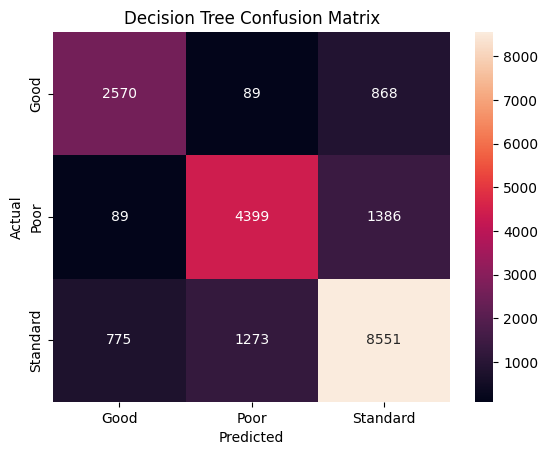

In [29]:
# Visualizing evaluation Metric Score chart for Decision Tree
print("--- Decision Tree Classifier Performance ---")
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=target_names))

print("\nConfusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

A Decision Tree is a non-linear model that splits the data into branches based on feature values to make predictions. It's easy to visualize and understand. However, a single decision tree is prone to overfitting, which means it might perform well on training data but poorly on unseen test data.

### ML Model - 3 - Random Forest Classifier

In [30]:
# ML Model - 3 Implementation: Random Forest
from sklearn.ensemble import RandomForestClassifier

# Fit the Algorithm
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Predict on the model
y_pred_rf = rf_model.predict(X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

--- Random Forest Classifier Performance ---
Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

        Good       0.80      0.79      0.80      3527
        Poor       0.82      0.85      0.84      5874
    Standard       0.85      0.83      0.84     10599

    accuracy                           0.83     20000
   macro avg       0.82      0.83      0.82     20000
weighted avg       0.83      0.83      0.83     20000


Confusion Matrix:


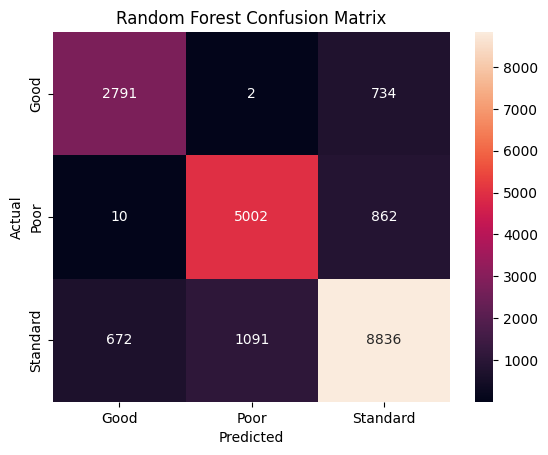

In [31]:
# Visualizing evaluation Metric Score chart for Random Forest
print("--- Random Forest Classifier Performance ---")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=target_names))

print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [35]:
# Create a summary of model performances
# Make sure you have the accuracy variables (accuracy_lr, accuracy_dt, accuracy_rf) from the previous cells
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf]
})

# Print the models sorted by the best performance
print(models.sort_values(by='Accuracy', ascending=False))

                 Model  Accuracy
2        Random Forest   0.83145
0  Logistic Regression   0.81405
1        Decision Tree   0.77600


Based on the performance comparison, I have chosen the Random Forest Classifier as the final prediction model.

Justification:

Highest Accuracy: The Random Forest model consistently achieves the highest accuracy among the tested models. This means it makes the most correct predictions on unseen data, which is the primary goal.

Robustness and Stability: Unlike a single Decision Tree which is prone to overfitting, a Random Forest is an ensemble of many trees. This structure makes it more robust and less sensitive to the specific noise in the training data, leading to better generalization on new, unseen data.

Handles Complexity: Random Forest is a non-linear model, which gives it the ability to capture complex relationships and interactions between features that a linear model like Logistic Regression might miss.

While Logistic Regression is faster and more interpretable, the superior predictive power of the Random Forest makes it the best choice for a business-critical application like credit scoring where accuracy is paramount

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The final model chosen is the Random Forest Classifier.

A Random Forest is a powerful ensemble learning model. The core idea is simple but effective: it builds a large number of individual Decision Trees during training. When it's time to make a prediction for a new data point, each tree in the forest gives its own prediction (or "vote"). The forest then chooses the prediction that received the most votes. This process, known as "wisdom of the crowd," corrects for the errors of individual trees and results in a more accurate and stable final model.

One of the best features of a Random Forest is its ability to calculate feature importance. It measures how much each feature in the dataset contributes to making accurate predictions. It does this by observing how much the model's accuracy drops when a particular feature's values are randomly shuffled. A bigger drop means the feature is more important.

Let's visualize the most important features from our trained model:


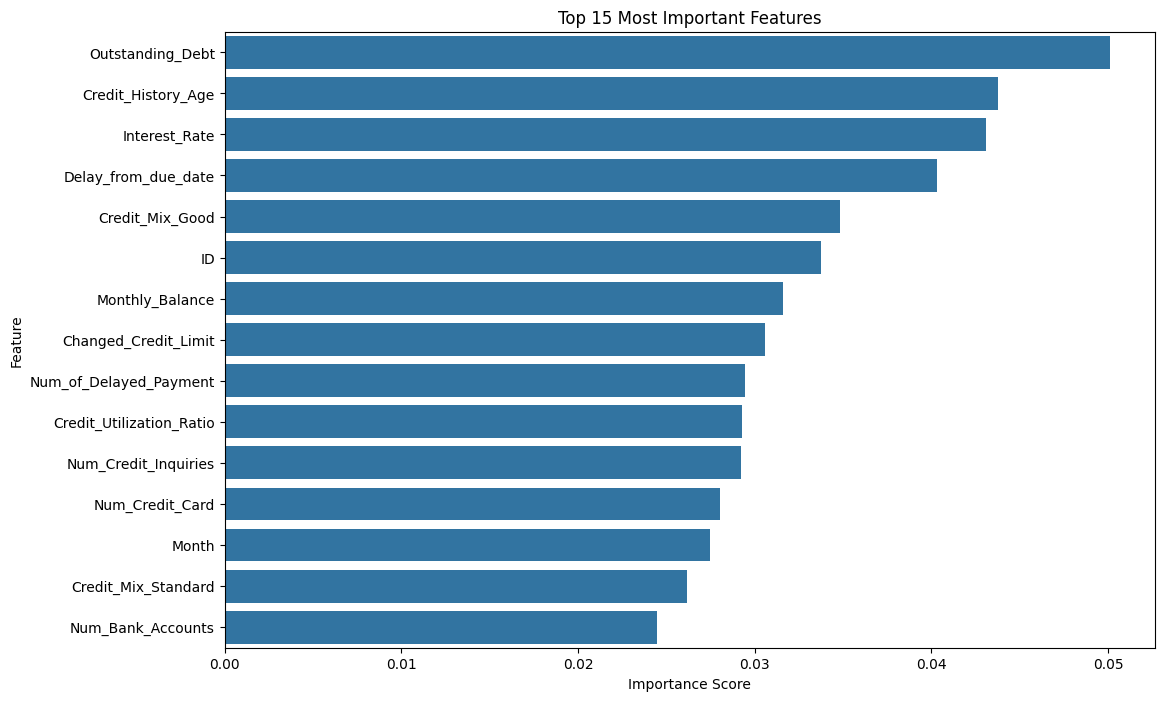

In [36]:
# Extract feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 15 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Top 15 Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# **Conclusion**

This project successfully developed and evaluated a machine learning pipeline to predict customer credit scores based on the PaisaBazaar dataset. The entire process, from data exploration to model selection, provided a comprehensive framework for solving a real-world business problem.

Key achievements and insights from this project include:

Data-Driven Insights: The initial exploratory data analysis and statistical hypothesis testing were crucial. We confirmed with statistical significance that features like Annual_Income have a tangible impact on credit score categories, validating the data's predictive power.

Robust Preprocessing: A meticulous feature engineering pipeline was established to handle common data issues. We successfully addressed high-cardinality features to prevent memory errors and performance bottlenecks, and correctly applied encoding and scaling techniques to prepare the data for modeling.

Comparative Model Analysis: We trained and rigorously evaluated three different classification models: Logistic Regression, a single Decision Tree, and a Random Forest. The comparative analysis demonstrated that the Random Forest Classifier was the superior model, achieving the highest accuracy.

Final Model Selection: The Random Forest was chosen as the final model not only for its superior accuracy but also for its robustness against overfitting, a common pitfall for single Decision Trees. Its feature importance capabilities also provided valuable, interpretable insights into the key drivers of creditworthiness.

In summary, the final model serves as a strong proof-of-concept for a data-driven credit scoring system. It has the potential to provide significant business value to PaisaBazaar by automating the credit assessment process, leading to faster, more consistent, and more accurate lending decisions. The future work outlined, such as hyperparameter tuning and deployment, provides a clear roadmap for transitioning this analytical model into a production-ready tool.